# EDA for stock data

In this notebook, I conduct an exploratory data analysis for Kaggle stock data. This is available at [here](https://www.kaggle.com/rishisankineni/text-similarity?select=train.csv)

The following steps are followed:
- Loading the data
- Preprocessing it
    - lower case
    - stopword removal
    - punctuation removal
    - lemmatization
- Exporatory Data Analysis
    - Dataset shape
    - Word Length
    - Most common tickers
    - Distribution of dependent variable (same_security)
    - Most common words (Zipf's Law, Power law distribution)

I just realized I used the word "*following*" twice above. Oh well! 

   

In [12]:
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Data


In [14]:
datapath = "data/train.csv"
desc = pd.read_csv(datapath)
desc.drop('Unnamed: 0', axis = 1, inplace = True)
desc.head()

,description_x,description_y,ticker_x,ticker_y,same_security
0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True
1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True
2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False
3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,DUK,DUK,True
4,visa inc class a,visa inc.,V,V,True


## Preprocessing
- lower case
- stopword removal
- punctuation removal
- lemmatization

In [15]:
STOPWORDS = stopwords.words('english') + list(string.punctuation)
lemmatizer = WordNetLemmatizer()
def preprocess(txt):
    """
    Preprocesses a string by lowering case, removing stopwrds, removing punctuation, lemmatizing
    
    Args:
        txt: a string to be preprocessed
    
    Returns:
        preprocessed string     
    """
    txt = txt.lower()
    txt = unidecode(txt)
    txt_tokenized = word_tokenize(txt)
    txt_tokenized = [item for item in txt_tokenized if item not in STOPWORDS]
    for index, word in enumerate(txt_tokenized):
        txt_tokenized[index] = lemmatizer.lemmatize(word)
    return " ".join(txt_tokenized)
desc['description_x'] = desc['description_x'].apply(preprocess)
desc['description_y'] = desc['description_y'].apply(preprocess)
desc.head()

,description_x,description_y,ticker_x,ticker_y,same_security
0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True
1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True
2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False
3,duke energy corp new com new isin us4 sedol b7...,duke energy corp new com new isin us26441c2044...,DUK,DUK,True
4,visa inc class,visa inc,V,V,True


## The much-awaited EDA

### Shape of our dataset

We can see that there are 2142 observations (rows), and 5 columns. Each observation represents a given description pair for a pair of stock tickers.

In [16]:
#shape of our dataset
#5 cols, 2142 descriptions (rows or observations)
desc.shape

(2142, 5)

### Word length of all descriptions

We can see that there is a bell-shaped distribution of word length. There are two modes (bimodal), thus making our word length distribution resemble the humps of a Bactrian camel. [linked here](https://upload.wikimedia.org/wikipedia/commons/8/82/2011_Trampeltier_1528.JPG) for reference. We can also observe a slight right-skew. A minority of descriptions are quite long! 


The mean description length is 27 words, and the SD is 11.09.

Mean Length of Description:  27.978524743230626
SD of Length of Description:  11.09304111694851


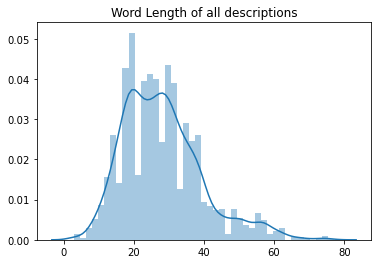

In [17]:
all_desc = list(desc['description_x']) + list(desc['description_y'])
sns.distplot(list(map(lambda x: len(x), all_desc)))
plt.title("Word Length of all descriptions")
print("Mean Length of Description: ", np.mean(desc['description_x'].apply(len)))
print("SD of Length of Description: ", np.std(desc['description_x'].apply(len)))

### Most common tickers

We can see that there are the top three tickers are all related to Vanguard in some way. The other usual suspects (Google, FB, Visa, Ford) are also there. 

Text(0.5, 1.0, 'Counts of tickers')

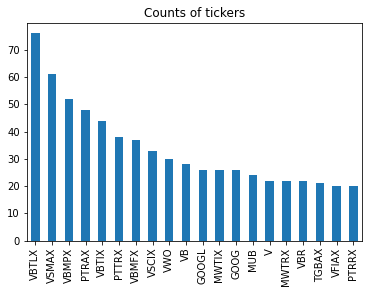

In [18]:
all_tickers = pd.concat([desc['ticker_x'], desc['ticker_y']], axis = 0)
all_tickers.value_counts(ascending = False).head(20).plot(kind = 'bar')
plt.title("Counts of tickers")

### Distribution of dependent variable (same_security)

As any good data scientist would tell you, it is also important to visualize the dependent variable. I do that here. We an see that there are a lot more True than False. That's good because it is said that Truth always wins.

Text(0.5, 1.0, 'Distribution of same_security')

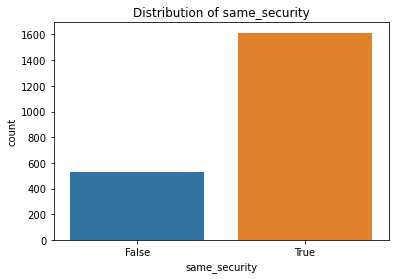

In [19]:
#most are matches (i.e. True)
sns.countplot(desc['same_security'])
plt.title("Distribution of same_security")

### Distribution of most common words

As you may have observed, no business class is complete without a good dose of the fabled 80/20 rule. Here it is. 

In NLP, this occurs in the form of Zipf's Law. [linked here](https://en.wikipedia.org/wiki/Zipf%27s_law) 
Here we can see that the top 20% of most common words collectively contribute ~80% of all word occurences.

The below distribution is also called a Power Law Distribution.

Text(0.5, 1.0, 'most common tokens in descriptions')

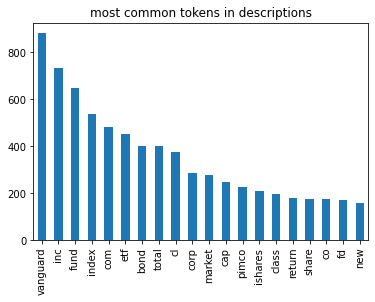

In [20]:
# most common words
tokens = []
[tokens.append(word_tokenize(desc)) for desc in all_desc]
#we can see a classic power law distribution. (as predicted by Zipf's Law)
all_tokens = [item for sublist in tokens for item in sublist]
pd.Series(all_tokens).value_counts(ascending= False, normalize= False).head(20).plot(kind = 'bar')
plt.title('most common tokens in descriptions')


In case you didn't believe me, here it is.

In [22]:
#(the top ~20% words contribute ~80% of occurences)
token_value_counts = pd.Series(all_tokens).value_counts(ascending= False, normalize= True)
print("the top 20% of words contribute {} % of all occurences.".format(
      np.sum(token_value_counts.head(int(0.2*len(desc))).values)*100))

the top 20% of words contribute 85.06860768209316 % of all occurences.


**And that my friends is the end of the EDA, as conducted by yours truly!** 